## Importing all necessary libraries for the whole notebook

In [4]:
%matplotlib inline
import requests
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import date, datetime, timedelta                #for saving updates files with today's time stamp and requesting right weather
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [9]:
import json

### Functions for notebook

In [5]:
## define formula for calculating daylight length
def Daylight(latitude,day):
    P = math.asin(0.39795 * math.cos(0.2163108 + 2 * math.atan(0.9671396 * math.tan(.00860 * (day - 186)))))
    pi = math.pi
    daylightamount = 24 - (24 / pi) * math.acos((math.sin((0.8333 * pi / 180)
    + math.sin(latitude * pi / 180) * math.sin(P)) / (math.cos(latitude * pi / 180) * math.cos(P))))
    return daylightamount

print(Daylight(-29, 1))   #daylight hours in  example location in SA on Jan 1st

# define formula for decimal degree recalc
def decdegree(d,m,s,go):
    dd = d + m/60 + s/3600
    if go == 'N' or go == 'E':
        return dd
    else:
        return -dd

    decdegree(29, 41, 3, go='S')
    
# Latitude = round(decdegree(11,5,9.9, "S"), 2)
# Longitude = round(decdegree(49,43,2.7, "W"), 2)
# 31°22'60'' S 57°58'0'' O  Salto in South America for Luis Mattos 6/1/2020
Latitude = round(decdegree(31,22,60, "S"), 2)
Longitude = round(decdegree(57,58,0, "W"), 2)
print(str(Latitude) +', '+ str(Longitude))    

13.949517841377563
-31.38, -57.97


In [4]:
# request for EO Australian pistachios
#Can you make me a graph for each location with the average hi temp, lo temp, and rainfall by day.  Then show on the graph the lowest recoded temp by day.

# Amajari - Roraima State
Latitude = round(decdegree(3,28,54.08, "N"), 2)
Longitude = round(decdegree(60,54,0.35, "W"), 2)
print(str(Latitude) +', '+ str(Longitude))
# kmz file untitled, looks like  'SA Trials':[3.85 , -59.59]


3.48, -60.9


### Description of location request

USA Seed Production Grids Alvin-Danbury 29.259047	-95.221234



In [6]:
# build a dictionary of locations, by running the cell above if locations come not in DDegree format

locations = { 'Australian Pistachios': [-34.69, 142.8],
            'P1-T1-AT2': [40.19,-86.08],'Landviser TX': [29.51,-95.22], 'Amajari - Roraima State': [3.48, -60.9], 'SA Trials':[3.85 , -59.59],
            'Salto':[-31.38, -57.97], 'Lajas':[18.04,-67.50], 
             'Alvin-Danbury': [29.26, -95.22], 'El Campo': [29.26, -96.72], 'Eagle Lake':[29.77,-96.27],
             'Bay City': [28.75,-96.22], 'Beaumont': [28.75,-96.22], 
             'Louisiana':[32.27,-91.22],'Dumas AR': [33.80,-91.72], 'Jonesboro AR': [35.297, -90.77]
            }

less2days = datetime.today() - timedelta(days=2)
end_date = less2days.strftime('%Y%m%d')                 
#automatically imputs string of today's date - 2 days (NASA server delay) into server request URL below

print(end_date)

20230127


In [7]:
# Change this part for each location from the dictionary above, just location # (Loc_N) needs to be changed

#input location N to process
loc_N = 0
filename = list(locations)[loc_N]   # it also becames a key to access LAT/LON
LAT = locations[filename][0]
LON = locations[filename][1]

print(filename)
print(LAT)
print(LON)

Australian Pistachios
-34.69
142.8


## Getting the link to CSV file from  API call to NASA POWER site

In [13]:
# the request for JSON file with dictionary encoding actual link to download CSV file with daily weather data for a single location (LAT/LONG) from NASA POWER site
response = 'https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?request=execute&identifier=SinglePoint&parameters=T2M_MIN,T2M,T2M_MAX,T2MDEW,RH2M,PRECTOT,WS2M_MIN,WS2M,WS2M_MAX&'+'startDate=19810101&endDate=' + end_date + '&userCommunity=AG&tempAverage=DAILY&outputList=CSV&' + 'lat=' + str(LAT) + '&lon=' + str(LON) + '&user=anonymous'
print(response)

# /api/temporal/daily/point?parameters=T2M,PS,WS10M&community=AG&longitude=0&latitude=0&start=20170101&end=20170201&format=CSV

# V2 requests format for point NASA 2023-01-29
# https://power.larc.nasa.gov/api/temporal/daily/point?start=19810101&end=20230125&latitude=-34.69&longitude=142.8&community=ag&parameters=T2M_MIN%2CT2M%2CT2M_MAX%2CT2MDEW%2CRH2M%2CPRECTOT%2CWS2M_MIN%2CWS2M%2CWS2M_MAX&format=csv&header=true&time-standard=lst&site-elevation=100

https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?request=execute&identifier=SinglePoint&parameters=T2M_MIN,T2M,T2M_MAX,T2MDEW,RH2M,PRECTOT,WS2M_MIN,WS2M,WS2M_MAX&startDate=19810101&endDate=20230127&userCommunity=AG&tempAverage=DAILY&outputList=CSV&lat=-34.69&lon=142.8&user=anonymous


In [10]:
# the request for JSON file with dictionary encoding actual link to download CSV file with daily weather data for a single location (LAT/LONG) from NASA POWER site
response = requests.get('https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?request=execute&identifier=SinglePoint&parameters=T2M_MIN,T2M,T2M_MAX,T2MDEW,RH2M,PRECTOT,WS2M_MIN,WS2M,WS2M_MAX&'
                        + 'startDate=19810101&endDate=' + end_date + '&userCommunity=AG&tempAverage=DAILY&outputList=CSV&'
                        + 'lat=' + str(LAT) + '&lon=' + str(LON) + '&user=anonymous')

# the code below would result in error if server is not available
# succesful json call is returned as dictionary of dictionaries (in this case - 2 levels)
try:
    data = response.json()    
    print(response.status_code) # use this to debug if you getting JSON (200) or error HTML (404)
    URL = data['outputs']['csv']
    print(URL)       # bingo - here is the direct link to the download file!
    
except json.decoder.JSONDecodeError:
    print("There is a possible problem with NASA server, check the link https://power.larc.nasa.gov")
 

422


KeyError: 'outputs'

##  Loading data from CSV link and calculating actual dates, GDD and risks

In [14]:
URL = 'POWER_Point_Daily_19810101_20230125_034d69S_142d80E_LST.csv'

In [16]:
# Loading data from the downloaded CSV
missing_values = [-99,-999]  #this is specific to CSV file format for single location
df = pd.read_csv(URL,
                  skiprows=18, na_values = missing_values)  #importing taking into account header rows and missing values

df['Date'] = pd.to_datetime(df['YEAR'] * 1000 + df['DOY'], format="%Y%j")   #recalculating actual date for each observation
df = df.set_index(df['Date'])                                               #make a date index for weather


#calculating GDDs (Growing degree days) - remember do not calculate negative GDDs!
df['GDD'] = np.where((df['T2M'] - 10)>0, df['T2M']-10, 0)
df['negGDD'] = df['T2M']-10

df['CumGDD'] = df.groupby('YEAR')['GDD'].cumsum()                         #accumulated GDD per year starting Jan 1st
df['Frost-5C'] = np.where(df['T2M_MIN']<=-5, 1, 0)                          # creating column for counting days Tmin<-5C
df['Frost0C'] = np.where(df['T2M_MIN']<=0, 1, 0)                          # creating column for counting days Tmin<0C

# calculating week of the year from date
#df['week#'] = df['Date'].dt.week

# Calculating risks of the Tmin<20, Tmin<19 etc Tmin<15 on the original df dataframe
df['Tmin<=20C'] = np.where(df['T2M_MIN']<=20, 1, 0)                          # creating column for counting days Tmin<=20C
df['Tmin<=19C'] = np.where(df['T2M_MIN']<=19, 1, 0)                          # creating column for counting days Tmin<=19C
df['Tmin<=18C'] = np.where(df['T2M_MIN']<=18, 1, 0)                          # creating column for counting days Tmin<=18C
df['Tmin<=17C'] = np.where(df['T2M_MIN']<=17, 1, 0)                          # creating column for counting days Tmin<=17C
df['Tmin<=16C'] = np.where(df['T2M_MIN']<=16, 1, 0)                          # creating column for counting days Tmin<=16C
df['Tmin<=15C'] = np.where(df['T2M_MIN']<=15, 1, 0)                          # creating column for counting days Tmin<=15C
df['Tmax<=30C'] = np.where(df['T2M_MAX']<=30, 1, 0)                          # creating column for counting days Tmax<=30C

# Calculating risks of Tmean<24.5 and Rain > 1 mm (old Seed Production parameters)
df['Tav<=24_5C'] = np.where(df['T2M']<=24.5, 1, 0)                          # creating column for counting days Tmean<=24.5C
df['Rain>1mm'] = np.where(df['PRECTOTCORR']>1, 1, 0)                          # creating column for counting days Rain > 1 mm
df.tail()

# dropping extra date columns
df.drop(columns=['Date'], inplace=True)
df.tail(3)

,YEAR,DOY,WS2M_MIN,WS2M_MAX,T2MDEW,WS2M,T2M_MIN,RH2M,T2M_MAX,T2M,PRECTOTCORR,PSC,GDD,negGDD,CumGDD,Frost-5C,Frost0C,Tmin<=20C,Tmin<=19C,Tmin<=18C,Tmin<=17C,Tmin<=16C,Tmin<=15C,Tmax<=30C,Tav<=24_5C,Rain>1mm
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-23,2023,23,0.45,3.2,12.89,1.53,17.45,47.94,33.08,26.24,0.46,99.96,16.24,16.24,373.05,0,0,1,1,1,0,0,0,0,0,0
2023-01-24,2023,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,373.05,0,0,0,0,0,0,0,0,0,0,0
2023-01-25,2023,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,373.05,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# finding the lowest temp of DOY and year when it happened
df_Tmin = df['DOY']
# user-defined tab name to write to Excel file
stats = '1981-2022'

#do selection of the years for statistics
dfsel1 = df[df['YEAR']<= 2022]

# calculating daily summary statistics and creating 2nd dataframe
doy_fnd = dfsel1.groupby(['DOY'], as_index=False).agg({'T2M_MIN': ["count", min, mean, max, median, std],
                                                                'T2M': [min, mean, max, median, std],
                                                                'T2M_MAX': [min, mean, max, median, std], 
                                                                 })
# concatenating two top rows of the dataframe for clean output
doy_fnd.columns = ['_'.join(x) for x in doy_fnd.columns.ravel()]   
# this will create joint column name from 2-level column head created by default

# find out the year of the lowest temperatires
#doy_fnd['Year_lowest'] = np.where(df['']

# calculate # of times Tmin was below -5 C

# calculate # of times Tmin was below freezing
print("Created stats dataframe")

doy_fnd.head()


Created stats dataframe


C:\Users\laris\AppData\Local\Temp\ipykernel_4272\4023661611.py:15: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  doy_fnd.columns = ['_'.join(x) for x in doy_fnd.columns.ravel()]


,DOY_,T2M_MIN_count,T2M_MIN_min,T2M_MIN_mean,T2M_MIN_max,T2M_MIN_median,T2M_MIN_std,T2M_min,T2M_mean,T2M_max,T2M_median,T2M_std,T2M_MAX_min,T2M_MAX_mean,T2M_MAX_max,T2M_MAX_median,T2M_MAX_std
0,1,42,9.89,18.344524,26.15,18.830,3.999817,17.63,26.724286,34.11,27.340,4.417154,23.48,34.800714,43.12,34.800,5.176158
1,2,42,9.09,17.578571,26.98,17.275,4.200294,17.75,26.100238,35.56,24.740,4.833212,24.48,34.349286,44.04,32.935,5.637099
2,3,42,9.98,17.289762,28.74,16.720,4.503445,17.20,26.054048,36.04,25.110,4.926971,21.83,34.373810,48.99,32.935,5.880008
3,4,42,11.19,16.842619,24.12,16.195,3.962233,18.43,25.286429,34.99,24.530,4.675155,25.46,33.233810,46.98,32.695,5.329790
4,5,42,9.80,16.954762,27.09,16.475,4.240203,18.69,25.259524,36.74,25.085,4.507946,24.53,33.248333,44.95,33.435,4.831546


## Calculating statistics and risks for all available full years

In [25]:
# user-defined tab name to write to Excel file
stats = '1981-2022'

#do selection of the years for statistics
dfsel = df[df['YEAR']<= 2022]

# calculating daily summary statistics and creating 2nd dataframe
doystats = dfsel.groupby(['DOY'], as_index=False).agg({'T2M_MIN': ["count", min, mean, max, median, std],
                                                                'T2M': [min, mean, max, median, std],
                                                                'T2M_MAX': [min, mean, max, median, std], 
                                                                'PRECTOTCORR' : [min, mean, max, median, std], 'Rain>1mm':[sum],
                                                                'GDD' : [min, mean, max, median, std],
                                                                'CumGDD' : [min, mean, max, median, std],
                                                                'Frost-5C' :[sum], 'Frost0C' :[sum],
                                                                'Tmin<=20C' :[sum],'Tmin<=19C' :[sum], 'Tmin<=18C' :[sum], 
                                                                'Tmin<=17C' :[sum], 'Tmin<=16C' :[sum], 'Tmin<=15C' :[sum],
                                                                'Tmax<=30C' :[sum], 'Tav<=24_5C' :[sum],
                                                                 'T2MDEW' : [min, mean, max, median, std],
                                                                 'RH2M' : [min, mean, max, median, std],
                                                                  'WS2M' : [min, mean, max, median, std]}) 
# concatenating two top rows of the dataframe for clean output
doystats.columns = ['_'.join(x) for x in doystats.columns.ravel()]   
# this will create joint column name from 2-level column head created by default

# calculating probability of Tmin<=-5C
doystats['Frost-5C_%'] = (doystats['Frost-5C_sum'] / doystats['T2M_MIN_count']) * 100

# calculating probability of Tmin<=0C
doystats['Frost0C_%'] = (doystats['Frost0C_sum'] / doystats['T2M_MIN_count']) * 100

# calculating probability of Rain<1mm
doystats['Rain>1mm_%'] = (doystats['Rain>1mm_sum'] / doystats['T2M_MIN_count']) * 100

# calculating probabilities of Tmin<=20C, etc
doystats['Tav<=24_5C_%'] = (doystats['Tav<=24_5C_sum'] / doystats['T2M_MIN_count']) * 100
doystats['Tmin<=20C_%'] = (doystats['Tmin<=20C_sum'] / doystats['T2M_MIN_count']) * 100
doystats['Tmin<=19C_%'] = (doystats['Tmin<=19C_sum'] / doystats['T2M_MIN_count']) * 100
doystats['Tmin<=18C_%'] = (doystats['Tmin<=18C_sum'] / doystats['T2M_MIN_count']) * 100
doystats['Tmin<=17C_%'] = (doystats['Tmin<=17C_sum'] / doystats['T2M_MIN_count']) * 100
doystats['Tmin<=16C_%'] = (doystats['Tmin<=16C_sum'] / doystats['T2M_MIN_count']) * 100
doystats['Tmin<=15C_%'] = (doystats['Tmin<=15C_sum'] / doystats['T2M_MIN_count']) * 100
doystats['Tmax<=30C_%'] = (doystats['Tmax<=30C_sum'] / doystats['T2M_MIN_count']) * 100

### Calculating daylength column in Panda's dataframe by applying formula above
doystats['DayLight'] = doystats.apply(lambda x: Daylight(-34.69,x['DOY_']),axis=1)

#calculating cumulative GDDs columns DOY_(index): Sept1st=244 (0), Oct1st= 274(31), Nov1st= 305(62), Dec1st= 335(92) 
doystats['AcGDD1stJan'] = doystats['GDD_mean'].cumsum()

# creating fake dates for plotting annual summary - fake date for 2018
doystats['Fdate'] = pd.to_datetime(2019000 + doystats['DOY_'], format="%Y%j")

print ('Created stats dataframe')
doystats.head()

Created stats dataframe


C:\Users\laris\AppData\Local\Temp\ipykernel_4272\210622373.py:22: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  doystats.columns = ['_'.join(x) for x in doystats.columns.ravel()]


,DOY_,T2M_MIN_count,T2M_MIN_min,T2M_MIN_mean,T2M_MIN_max,T2M_MIN_median,T2M_MIN_std,T2M_min,T2M_mean,T2M_max,T2M_median,T2M_std,T2M_MAX_min,T2M_MAX_mean,T2M_MAX_max,T2M_MAX_median,T2M_MAX_std,PRECTOTCORR_min,PRECTOTCORR_mean,PRECTOTCORR_max,PRECTOTCORR_median,PRECTOTCORR_std,Rain>1mm_sum,GDD_min,GDD_mean,GDD_max,GDD_median,GDD_std,CumGDD_min,CumGDD_mean,CumGDD_max,CumGDD_median,CumGDD_std,Frost-5C_sum,Frost0C_sum,Tmin<=20C_sum,Tmin<=19C_sum,Tmin<=18C_sum,Tmin<=17C_sum,Tmin<=16C_sum,Tmin<=15C_sum,Tmax<=30C_sum,Tav<=24_5C_sum,T2MDEW_min,T2MDEW_mean,T2MDEW_max,T2MDEW_median,T2MDEW_std,RH2M_min,RH2M_mean,RH2M_max,RH2M_median,RH2M_std,WS2M_min,WS2M_mean,WS2M_max,WS2M_median,WS2M_std,Frost-5C_%,Frost0C_%,Rain>1mm_%,Tav<=24_5C_%,Tmin<=20C_%,Tmin<=19C_%,Tmin<=18C_%,Tmin<=17C_%,Tmin<=16C_%,Tmin<=15C_%,Tmax<=30C_%,DayLight,AcGDD1stJan,Fdate
0,1,42,9.89,18.344524,26.15,18.830,3.999817,17.63,26.724286,34.11,27.340,4.417154,23.48,34.800714,43.12,34.800,5.176158,0.0,0.754286,16.42,0.0,2.600271,7,7.63,16.724286,24.11,17.340,4.417154,7.63,16.724286,24.11,17.340,4.417154,0,0,25,21,20,15,12,8,7,17,-0.36,7.559286,17.78,7.075,4.731683,15.25,35.364762,65.75,34.035,13.442803,1.48,3.577381,6.04,3.525,1.089207,0.0,0.0,16.666667,40.476190,59.523810,50.000000,47.619048,35.714286,28.571429,19.047619,16.666667,14.416996,16.724286,2019-01-01
1,2,42,9.09,17.578571,26.98,17.275,4.200294,17.75,26.100238,35.56,24.740,4.833212,24.48,34.349286,44.04,32.935,5.637099,0.0,0.572619,7.54,0.0,1.687008,5,7.75,16.100238,25.56,14.740,4.833212,17.07,32.824524,48.25,32.305,8.701671,0,0,32,26,23,20,17,14,11,18,-0.43,7.518333,17.26,7.455,4.249278,12.81,36.089286,63.75,35.715,11.904845,2.05,3.852143,6.24,3.740,1.014078,0.0,0.0,11.904762,42.857143,76.190476,61.904762,54.761905,47.619048,40.476190,33.333333,26.190476,14.407923,32.824524,2019-01-02
2,3,42,9.98,17.289762,28.74,16.720,4.503445,17.20,26.054048,36.04,25.110,4.926971,21.83,34.373810,48.99,32.935,5.880008,0.0,0.753095,10.93,0.0,2.167695,5,7.20,16.054048,26.04,15.110,4.926971,27.04,48.878571,74.29,47.500,12.612859,0,0,31,28,27,22,19,17,10,19,-3.35,7.603095,14.75,7.220,3.897614,12.12,36.347857,61.25,34.310,11.562698,1.86,3.957143,8.05,3.855,1.319453,0.0,0.0,11.904762,45.238095,73.809524,66.666667,64.285714,52.380952,45.238095,40.476190,23.809524,14.398003,48.878571,2019-01-03
3,4,42,11.19,16.842619,24.12,16.195,3.962233,18.43,25.286429,34.99,24.530,4.675155,25.46,33.233810,46.98,32.695,5.329790,0.0,0.496905,10.52,0.0,1.716217,6,8.43,15.286429,24.99,14.530,4.675155,37.82,64.165000,96.59,60.885,15.860837,0,0,31,27,27,25,19,16,14,21,-1.08,7.110000,15.00,6.800,4.088607,14.31,36.350714,60.06,38.220,10.460383,1.40,3.837381,6.74,3.665,1.198045,0.0,0.0,14.285714,50.000000,73.809524,64.285714,64.285714,59.523810,45.238095,38.095238,33.333333,14.387246,64.165000,2019-01-04
4,5,42,9.80,16.954762,27.09,16.475,4.240203,18.69,25.259524,36.74,25.085,4.507946,24.53,33.248333,44.95,33.435,4.831546,0.0,0.793571,23.08,0.0,3.784943,2,8.69,15.259524,26.74,15.085,4.507946,53.57,79.424524,116.25,76.865,17.889142,0,0,32,31,29,24,18,16,12,18,0.74,6.772619,15.73,6.750,3.757124,16.00,35.762857,56.25,36.940,10.925780,1.73,3.612857,5.94,3.510,1.172998,0.0,0.0,4.761905,42.857143,76.190476,73.809524,69.047619,57.142857,42.857143,38.095238,28.571429,14.375659,79.424524,2019-01-05


In [26]:
# custom tab name for statistics sheet in Excel file
stats10 = '2011-2020'

#do selection of the years for statistics
dfsel = df[(df['YEAR']<= 2020) & (df['YEAR']>= 2011)]

# calculating daily summary statistics and creating 2nd dataframe
doystats10 = dfsel.groupby(['DOY'], as_index=False).agg({'T2M_MIN': ["count", min, mean, max, median, std],
                                                                'T2M': [min, mean, max, median, std],
                                                                'T2M_MAX': [min, mean, max, median, std], 
                                                                'PRECTOTCORR' : [min, mean, max, median, std],'Rain>1mm':[sum],
                                                                'GDD' : [min, mean, max, median, std],
                                                                'CumGDD' : [min, mean, max, median, std],
                                                                'Tmin<=20C' :[sum],'Tmin<=19C' :[sum], 'Tmin<=18C' :[sum], 
                                                                'Tmin<=17C' :[sum], 'Tmin<=16C' :[sum], 'Tmin<=15C' :[sum],
                                                                'Tmax<=30C' :[sum], 'Tav<=24_5C' :[sum],  
                                                                 'T2MDEW' : [min, mean, max, median, std],
                                                                 'RH2M' : [min, mean, max, median, std],
                                                                  'WS2M' : [min, mean, max, median, std]}) 
# concatenating two top rows of the dataframe for clean output
doystats10.columns = ['_'.join(x) for x in doystats10.columns.ravel()]   
# this will create joint column name from 2-level column head created by default

# calculating probability of Tmin<=5C
#doystats10['Frost5C_%'] = (doystats10['Frost5C_sum'] / doystats10['T2M_MIN_count']) * 100

# calculating probability of Rain>1mm
doystats10['Rain>1mm_%'] = (doystats10['Rain>1mm_sum'] / doystats10['T2M_MIN_count']) * 100

# calculating probabilities of Tmin<=20C, etc
doystats10['Tav<=24_5C_%'] = (doystats10['Tav<=24_5C_sum'] / doystats10['T2M_MIN_count']) * 100
doystats10['Tmin<=20C_%'] = (doystats10['Tmin<=20C_sum'] / doystats10['T2M_MIN_count']) * 100
doystats10['Tmin<=19C_%'] = (doystats10['Tmin<=19C_sum'] / doystats10['T2M_MIN_count']) * 100
doystats10['Tmin<=18C_%'] = (doystats10['Tmin<=18C_sum'] / doystats10['T2M_MIN_count']) * 100
doystats10['Tmin<=17C_%'] = (doystats10['Tmin<=17C_sum'] / doystats10['T2M_MIN_count']) * 100
doystats10['Tmin<=16C_%'] = (doystats10['Tmin<=16C_sum'] / doystats10['T2M_MIN_count']) * 100
doystats10['Tmin<=15C_%'] = (doystats10['Tmin<=15C_sum'] / doystats10['T2M_MIN_count']) * 100
doystats10['Tmax<=30C_%'] = (doystats10['Tmax<=30C_sum'] / doystats10['T2M_MIN_count']) * 100

### Calculating daylength column in Panda's dataframe by applying formula above
doystats10['DayLight'] = doystats10.apply(lambda x: Daylight(-34.69,x['DOY_']),axis=1)

# creating fake dates for plotting annual summary - fake date for 2018
doystats10['Fdate'] = pd.to_datetime(2019000 + doystats10['DOY_'], format="%Y%j")

print ('Created 20 years dataframe')
doystats10.head()

Created 20 years dataframe


C:\Users\laris\AppData\Local\Temp\ipykernel_4272\533562774.py:21: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  doystats10.columns = ['_'.join(x) for x in doystats10.columns.ravel()]


,DOY_,T2M_MIN_count,T2M_MIN_min,T2M_MIN_mean,T2M_MIN_max,T2M_MIN_median,T2M_MIN_std,T2M_min,T2M_mean,T2M_max,T2M_median,T2M_std,T2M_MAX_min,T2M_MAX_mean,T2M_MAX_max,T2M_MAX_median,T2M_MAX_std,PRECTOTCORR_min,PRECTOTCORR_mean,PRECTOTCORR_max,PRECTOTCORR_median,PRECTOTCORR_std,Rain>1mm_sum,GDD_min,GDD_mean,GDD_max,GDD_median,GDD_std,CumGDD_min,CumGDD_mean,CumGDD_max,CumGDD_median,CumGDD_std,Tmin<=20C_sum,Tmin<=19C_sum,Tmin<=18C_sum,Tmin<=17C_sum,Tmin<=16C_sum,Tmin<=15C_sum,Tmax<=30C_sum,Tav<=24_5C_sum,T2MDEW_min,T2MDEW_mean,T2MDEW_max,T2MDEW_median,T2MDEW_std,RH2M_min,RH2M_mean,RH2M_max,RH2M_median,RH2M_std,WS2M_min,WS2M_mean,WS2M_max,WS2M_median,WS2M_std,Rain>1mm_%,Tav<=24_5C_%,Tmin<=20C_%,Tmin<=19C_%,Tmin<=18C_%,Tmin<=17C_%,Tmin<=16C_%,Tmin<=15C_%,Tmax<=30C_%,DayLight,Fdate
0,1,10,15.26,19.559,26.15,19.980,3.383359,23.59,27.928,31.21,28.685,2.813633,31.20,36.370,39.73,37.160,2.933083,0.0,0.119,0.78,0.0,0.265600,0,13.59,17.928,21.21,18.685,2.813633,13.59,17.928,21.21,18.685,2.813633,5,4,4,3,2,0,0,2,-0.36,5.969,13.46,6.780,4.652468,15.62,29.718,47.44,25.625,11.079931,1.48,3.223,4.60,3.270,1.044787,0.0,20.0,50.0,40.0,40.0,30.0,20.0,0.0,0.0,14.416996,2019-01-01
1,2,10,14.31,18.672,23.15,18.450,3.202536,22.29,27.265,33.70,26.715,4.087246,29.65,35.586,43.74,35.725,4.839417,0.0,0.145,1.38,0.0,0.434339,1,12.29,17.265,23.70,16.715,4.087246,26.27,35.193,44.22,33.690,6.397977,7,5,5,4,2,1,1,3,-0.43,6.744,11.40,7.775,4.012808,12.81,32.775,46.56,31.965,11.551388,2.55,3.639,4.94,3.430,0.707507,10.0,30.0,70.0,50.0,50.0,40.0,20.0,10.0,10.0,14.407923,2019-01-02
2,3,10,13.13,19.061,26.81,19.220,4.726172,20.87,27.892,34.92,28.935,4.899560,29.01,36.765,44.11,37.405,5.908595,0.0,1.198,10.93,0.0,3.425687,1,10.87,17.892,24.92,18.935,4.899560,38.41,53.085,67.85,54.200,10.412395,6,5,4,4,4,3,1,3,-3.35,7.523,13.06,7.805,4.896475,12.12,33.012,48.38,33.935,11.645476,1.86,3.696,6.41,3.490,1.379357,10.0,30.0,60.0,50.0,40.0,40.0,40.0,30.0,10.0,14.398003,2019-01-03
3,4,10,11.19,18.877,24.12,19.845,4.069420,20.93,27.645,34.99,27.670,4.791519,28.85,35.926,46.98,35.910,5.986363,0.0,0.530,3.10,0.0,1.083503,2,10.93,17.645,24.99,17.670,4.791519,54.23,70.730,86.72,72.495,13.072238,6,3,3,3,2,2,2,3,2.37,8.228,14.23,7.810,3.494007,14.31,34.138,46.25,36.440,10.820962,1.93,3.779,5.88,3.570,1.231561,20.0,30.0,60.0,30.0,30.0,30.0,20.0,20.0,20.0,14.387246,2019-01-04
4,5,10,13.73,18.370,24.50,17.635,3.771330,20.46,26.306,34.72,24.415,5.160862,26.40,33.993,44.77,32.265,5.685037,0.0,0.055,0.26,0.0,0.092526,0,10.46,16.306,24.72,14.415,5.160862,66.39,87.036,107.78,85.250,14.396115,7,7,6,4,3,2,3,5,3.75,7.637,12.44,7.025,3.078521,16.00,34.518,45.81,34.530,9.207868,1.82,3.716,5.94,3.485,1.446899,0.0,50.0,70.0,70.0,60.0,40.0,30.0,20.0,30.0,14.375659,2019-01-05


### Selecting trial year data

In [27]:
#do selection of the trial yaer (2019)
df0 = df[df['YEAR']== 2022]
df19 = pd.DataFrame(df0)  # this is useful trick to cast the selected data range as actual dataframe to do calculations below
                          # otherwise applying a lambda function on the selection would through Warning

### Calculating daylength column in Panda's dataframe by applying formula above
df19['DayLight'] = df19.apply(lambda x: Daylight(-34.69,x['DOY']),axis=1)

print ('Created 2022 dataframe')
df19.head()

Created 2022 dataframe


,YEAR,DOY,WS2M_MIN,WS2M_MAX,T2MDEW,WS2M,T2M_MIN,RH2M,T2M_MAX,T2M,PRECTOTCORR,PSC,GDD,negGDD,CumGDD,Frost-5C,Frost0C,Tmin<=20C,Tmin<=19C,Tmin<=18C,Tmin<=17C,Tmin<=16C,Tmin<=15C,Tmax<=30C,Tav<=24_5C,Rain>1mm,DayLight
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,2022,1,1.41,4.58,6.37,3.30,23.34,20.62,41.75,33.21,0.0,99.35,23.21,23.21,23.21,0,0,0,0,0,0,0,0,0,0,0,14.416996
2022-01-02,2022,2,1.96,6.16,10.54,3.91,24.65,28.19,40.51,32.85,0.0,99.44,22.85,22.85,46.06,0,0,0,0,0,0,0,0,0,0,0,14.407923
2022-01-03,2022,3,3.10,5.08,7.12,4.41,21.05,30.56,36.06,28.54,0.0,99.70,18.54,18.54,64.60,0,0,0,0,0,0,0,0,0,0,0,14.398003
2022-01-04,2022,4,1.85,5.23,3.11,3.98,16.34,28.75,33.11,24.69,0.0,99.78,14.69,14.69,79.29,0,0,1,1,1,1,0,0,0,0,0,14.387246
2022-01-05,2022,5,1.88,5.15,8.08,3.30,16.15,39.56,33.56,25.24,0.0,99.60,15.24,15.24,94.53,0,0,1,1,1,1,0,0,0,0,0,14.375659


In [28]:
#do selection of the current year (2021)
df00 = df[df['YEAR']== 2022]
df20 = pd.DataFrame(df00)  # this is useful trick to cast the selected data range as actual dataframe to do calculations below
                          # otherwise applying a lambda function on the selection would through Warning

### Calculating daylength column in Panda's dataframe by applying formula above
df20['DayLight'] = df20.apply(lambda x: Daylight(-34.69,x['DOY']),axis=1)

print ('Created 2021 dataframe')
df20.tail()

Created 2021 dataframe


,YEAR,DOY,WS2M_MIN,WS2M_MAX,T2MDEW,WS2M,T2M_MIN,RH2M,T2M_MAX,T2M,PRECTOTCORR,PSC,GDD,negGDD,CumGDD,Frost-5C,Frost0C,Tmin<=20C,Tmin<=19C,Tmin<=18C,Tmin<=17C,Tmin<=16C,Tmin<=15C,Tmax<=30C,Tav<=24_5C,Rain>1mm,DayLight
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-27,2022,361,1.81,4.70,15.63,3.54,21.73,44.38,39.79,31.01,0.00,100.09,21.01,21.01,2584.39,0,0,0,0,0,0,0,0,0,0,0,14.450648
2022-12-28,2022,362,2.55,5.48,14.52,4.39,17.08,57.12,26.43,23.48,9.98,99.89,13.48,13.48,2597.87,0,0,1,1,1,0,0,0,1,1,1,14.446184
2022-12-29,2022,363,1.55,4.97,9.34,3.45,12.94,51.56,28.87,20.94,0.00,100.27,10.94,10.94,2608.81,0,0,1,1,1,1,1,1,1,1,0,14.440838
2022-12-30,2022,364,0.55,3.32,10.30,2.52,13.65,49.00,32.21,23.29,0.00,100.06,13.29,13.29,2622.10,0,0,1,1,1,1,1,1,0,1,0,14.434616
2022-12-31,2022,365,0.31,2.83,11.40,2.01,15.54,45.50,35.38,26.16,0.00,99.78,16.16,16.16,2638.26,0,0,1,1,1,1,1,0,0,0,0,14.427522


### Writing dataframes into output file - Excel with the correct names for each location

In [30]:
weatherend = datetime.today() - timedelta(days=2)  #substract 2 days from today's date to show last valid data point in file

# write all 3 dataframes into one Excel file. shorter Excel writing as suggested. better run from local Python environment
with pd.ExcelWriter(filename + '_daily-stats_1981-01-01_' + weatherend.strftime('%Y-%m-%d') + '.xlsx') as writer:
    df.to_excel(writer, sheet_name='All daily', index=True)
    df19.to_excel(writer, sheet_name='2022', index=True)
    df20.to_excel(writer, sheet_name='2022a', index=True)
    doystats.to_excel(writer, sheet_name=stats + 'stats', index=False)
    doystats10.to_excel(writer, sheet_name=stats10 + 'stats', index=False)
        
# Close the Pandas Excel writer and output the Excel file.
writer.save()
writer.close()

print('Excel file saved')

C:\Users\laris\AppData\Local\Temp\ipykernel_4272\2312368559.py:12: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


ValueError: I/O operation on closed file

### Graph the trial year (2015)

File with graph created, you can run other location now!


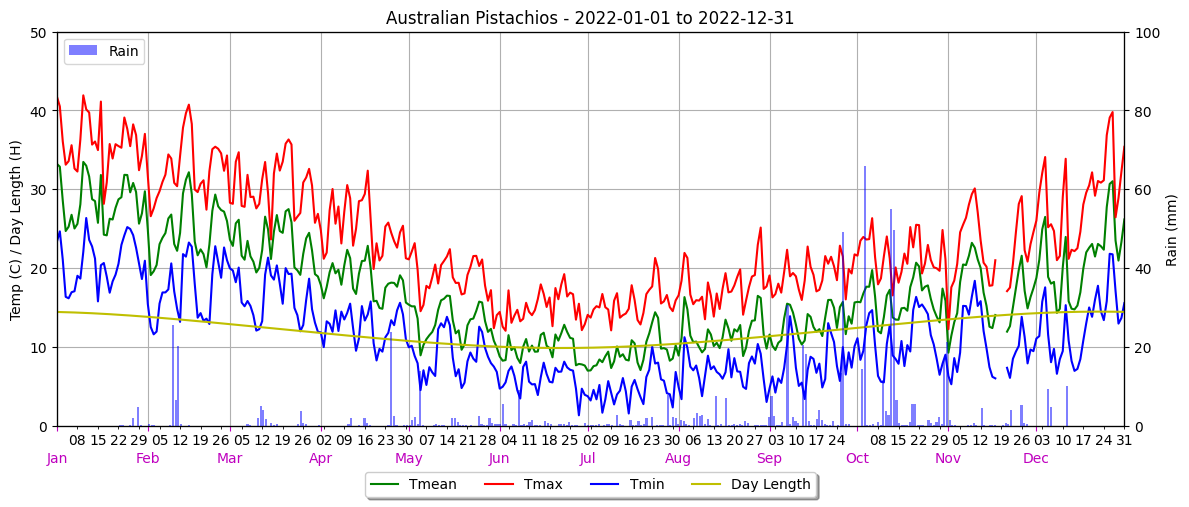

In [33]:
matplotlib.rc('figure', figsize=(12, 5))   # this is to overwrite default aspect of graph to make x-axis longer

fig, ax1 = plt.subplots()

# data to be plotted from dataframe - temperatures as line graphs
Dates = df19.index
Tmean = df19['T2M']
Tmax = df19['T2M_MAX']
Tmin = df19['T2M_MIN']
DayLgt = df19['DayLight']
#T5C = dfsept['Frost5C_%'].rolling(window=7).mean()   #plotting smooth probability from daily data - by rolling average
#AcGDD = df18_sept['AcGDD_15-Oct']

ax1.plot(Dates, Tmean, 'g', label='Tmean')
ax1.plot(Dates, Tmax, 'r', label='Tmax')
ax1.plot(Dates, Tmin, 'b', label='Tmin')
ax1.plot(Dates, DayLgt, 'y', label='Day Length')


# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Temp (C) / Day Length (H)')
ax1.tick_params('y')
ax1.set_ylim(0, 50)
ax1.set_xlim([datetime(2022, 1, 1), datetime(2022,12,31)])

# Creating twin axes for GDD cumulative and precipitation as a bar graph on secondary XY axes
ax2 = ax1.twinx()
ax3 = ax2.twiny()


# This is to plot Accumulated GDD on the second Y axis, but on the same (twin) X-axis

#ax2.plot(Dates, AcGDD, color= 'brown', label='GDD')
ax2.set_ylabel('Rain (mm)')
ax2.set_ylim(0, 100)

#data for bar graph
doy = df19.index
myRain = df19['PRECTOTCORR']

ax3.bar(doy, myRain, color='b', label='Rain', alpha=0.5)
ax3.set_xticks([])                  # to hide ticks on the second X-axis - top of the graph

# showing legend
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=4)
ax3.legend(loc='upper left')
#ax2.legend(loc='upper right')

# Formatting Date X-axis with monthly scale
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator(interval=7)       # every 7 days
myFmt = mdates.DateFormatter('%b')
minFmt = mdates.DateFormatter('%d')

ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(myFmt)
ax1.xaxis.set_minor_locator(days)
ax1.xaxis.set_minor_formatter(minFmt)
ax1.xaxis.set_tick_params(which='major', color='m', labelcolor='m', pad=15)


# Formatting second X-axis (DOY integers) to disappear
ax3.xaxis.set_major_formatter(plt.NullFormatter())

# Displaying grid for the Date axis
#ax1.grid(which='major', axis='x', color='m')
ax1.grid(True)

fig.tight_layout()
plt.title(filename + ' - ' + '2022-01-01 to 2022-12-31') 
# Saving graph to file
plt.savefig(filename + '_2022.png',dpi=300,transparent=False)
print('File with graph created, you can run other location now!')

### Plotting 20-years summary weather (Tems, Rain) in the same format as above

File with graph created, you can run other location now!


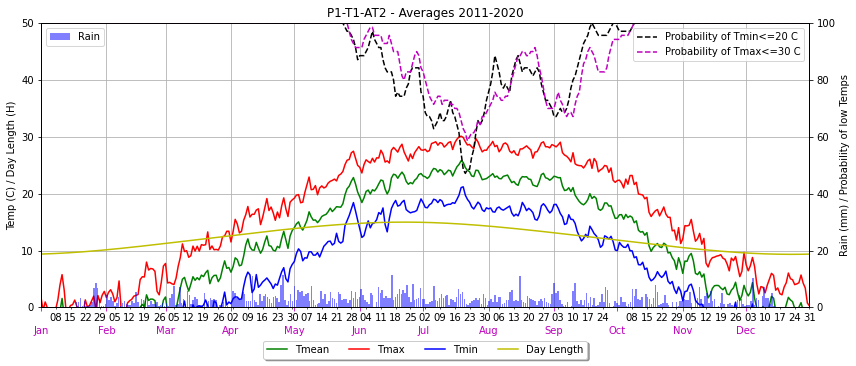

In [21]:
# creating fake dates for plotting annual summary - fake date for 2019
doystats10['Fdate19'] = pd.to_datetime(2019000 + doystats10['DOY_'], format="%Y%j")

matplotlib.rc('figure', figsize=(12, 5))   # this is to overwrite default aspect of graph to make x-axis longer

fig, ax1 = plt.subplots()

# data to be plotted from dataframe - temperatures as line graphs
Dates = doystats10['Fdate19']
Tmean = doystats10['T2M_mean']
Tmax = doystats10['T2M_MAX_mean']
Tmin = doystats10['T2M_MIN_mean']
DayLgt = doystats10['DayLight']
T20C = doystats10['Tmin<=20C_%'].rolling(window=7).mean()   #plotting smooth probability from daily data - by rolling average
T30C = doystats10['Tmax<=30C_%'].rolling(window=7).mean()   #plotting smooth probability from daily data - by rolling average

ax1.plot(Dates, Tmean, 'g', label='Tmean')
ax1.plot(Dates, Tmax, 'r', label='Tmax')
ax1.plot(Dates, Tmin, 'b', label='Tmin')
ax1.plot(Dates, DayLgt, 'y', label='Day Length')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Temp (C) / Day Length (H)')
ax1.tick_params('y')
ax1.set_ylim(0, 50)
ax1.set_xlim([datetime(2019, 1, 1), datetime(2019, 12, 31)])

# Creating twin axes for precipitation as a bar graph on secondary XY axes
ax2 = ax1.twinx()
ax3 = ax2.twiny()

# plotting probability of Tmin<=20C and Tmax<=30C on the second Y axis (with rain) but same dates X axis
ax2.plot(Dates, T20C, 'k--', label='Probability of Tmin<=20 C')
ax2.plot(Dates, T30C, 'm--', label='Probability of Tmax<=30 C')

ax2.set_ylabel('Rain (mm) / Probability of low Temps')
ax2.set_ylim(0, 100)


#data for bar graph
doy = doystats10.index
myRain = doystats10['PRECTOT_mean']

ax3.bar(doy, myRain, color='b', label='Rain', alpha=0.5)
ax3.set_xticks([])                  # to hide ticks on the second X-axis - top of the graph

# showing legend
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=4)
ax3.legend(loc='upper left')
ax2.legend(loc='upper right')

# Formatting Date X-axis with monthly scale
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator(interval=7)       # every 7 days
myFmt = mdates.DateFormatter('%b')
minFmt = mdates.DateFormatter('%d')

ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(myFmt)
ax1.xaxis.set_minor_locator(days)
ax1.xaxis.set_minor_formatter(minFmt)
ax1.xaxis.set_tick_params(which='major', color='m', labelcolor='m', pad=15)


# Formatting second X-axis (DOY integers) to disappear
ax3.xaxis.set_major_formatter(plt.NullFormatter())

# Displaying grid for the Date axis
#ax1.grid(which='major', axis='x', color='m')
ax1.grid(True)

fig.tight_layout()
plt.title(filename + ' - ' + 'Averages 2011-2020') 
# Saving graph to file
plt.savefig(filename + '_10years2011-2020temp-risks.png',dpi=300,transparent=False)
print('File with graph created, you can run other location now!')

### Plotting 40-years summary statistics for location

File with graph created, you can run other location now!


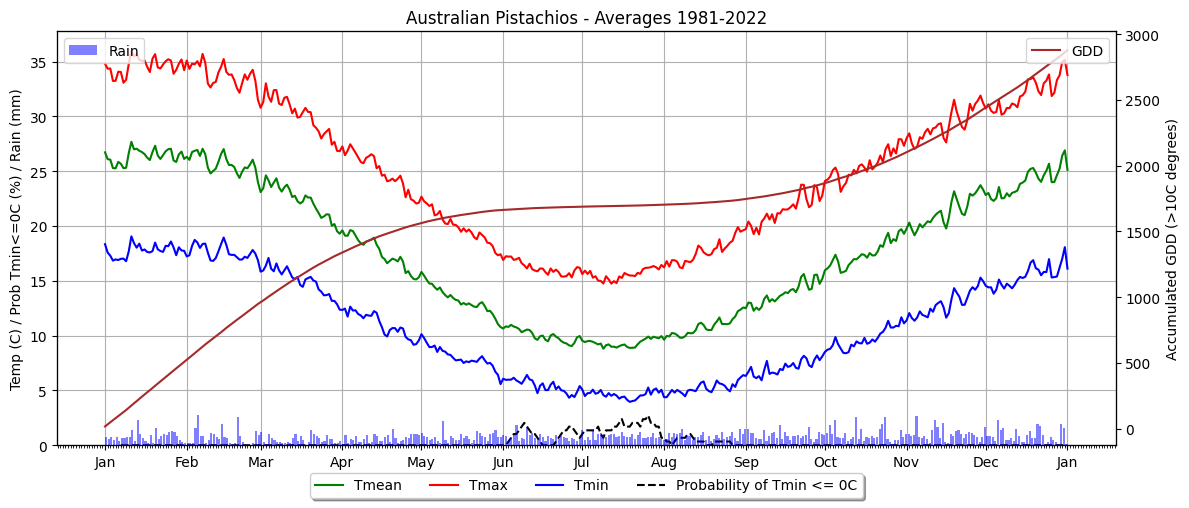

In [32]:

matplotlib.rc('figure', figsize=(12, 5))   # this is to overwrite default aspect of graph to make x-axis longer

fig, ax1 = plt.subplots()

# data to be plotted from dataframe - temperatures as line graphs
Dates = doystats['Fdate']
Tmean = doystats['T2M_mean']
Tmax = doystats['T2M_MAX_mean']
Tmin = doystats['T2M_MIN_mean']
T0C = doystats['Frost0C_%'].rolling(window=7).mean()   #plotting smooth probability from daily data - by rolling average
AcGDD = doystats['AcGDD1stJan']

ax1.plot(Dates, Tmean, 'g', label='Tmean')
ax1.plot(Dates, Tmax, 'r', label='Tmax')
ax1.plot(Dates, Tmin, 'b', label='Tmin')
ax1.plot(Dates, T0C, 'k--', label='Probability of Tmin <= 0C')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Temp (C) / Prob Tmin<=0C (%) / Rain (mm)')
ax1.tick_params('y')

# Creating twin axes for GDD cumulative and precipitation as a bar graph on secondary XY axes
ax2 = ax1.twinx()
ax3 = ax1.twiny()

# This is to plot Accumulated GDD on the second Y axis, but on the same (twin) X-axis

ax2.plot(Dates, AcGDD, color= 'brown', label='GDD')
ax2.set_ylabel('Accumulated GDD (>10C degrees)')

#data for bar graph
doy = doystats.index
myRain = doystats['PRECTOTCORR_mean']

ax3.bar(doy, myRain, color='b', label='Rain', alpha=0.5)
ax3.set_xticks([])                  # to hide ticks on the second X-axis - top of the graph

# showing legend
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
ax3.legend(loc='upper left')
ax2.legend(loc='upper right')

# Formatting Date X-axis with monthly scale
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()       # every day
myFmt = mdates.DateFormatter('%b')
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(myFmt)
ax1.xaxis.set_minor_locator(days)

# Formatting second X-axis (DOY integers) to disappear
ax3.xaxis.set_major_formatter(plt.NullFormatter())

# Displaying grid for the Date axis
ax1.grid(True)

fig.tight_layout()
plt.title(filename + ' - ' + 'Averages 1981-2022') 
# Saving graph to file
plt.savefig(filename + '_41years-summary.png',dpi=300,transparent=False)
print('File with graph created, you can run other location now!')

### Modify final graph to plot lowest low temps per Tim's request

File with graph created, you can run other location now!


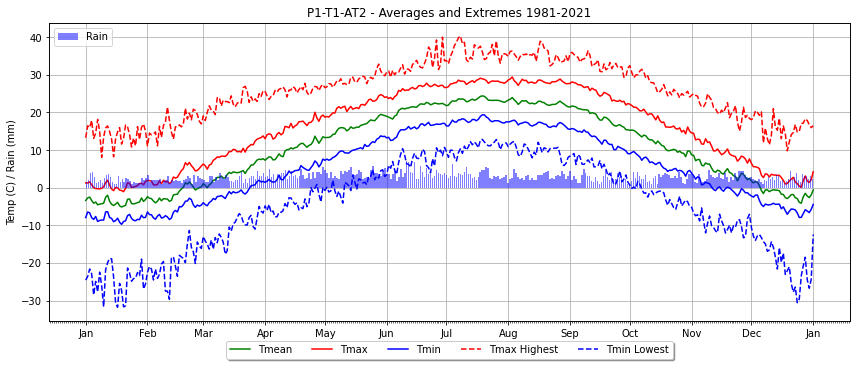

In [25]:

matplotlib.rc('figure', figsize=(12, 5))   # this is to overwrite default aspect of graph to make x-axis longer

fig, ax1 = plt.subplots()

# data to be plotted from dataframe - temperatures as line graphs
Dates = doystats['Fdate']
Tmean = doystats['T2M_mean']
Tmax = doystats['T2M_MAX_mean']
Tmin = doystats['T2M_MIN_mean']
Tmaxx = doystats['T2M_MAX_max']
Tminx = doystats['T2M_MIN_min']

ax1.plot(Dates, Tmean, 'g', label='Tmean')
ax1.plot(Dates, Tmax, 'r', label='Tmax')
ax1.plot(Dates, Tmin, 'b', label='Tmin')
ax1.plot(Dates, Tmaxx, 'r--', label='Tmax Highest')
ax1.plot(Dates, Tminx, 'b--', label='Tmin Lowest')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Temp (C) / Rain (mm)')
ax1.tick_params('y')

# Creating twin axes for GDD cumulative and precipitation as a bar graph on secondary XY axes
#ax2 = ax1.twinx()
ax3 = ax1.twiny()

# This is to plot Accumulated GDD on the second Y axis, but on the same (twin) X-axis

#ax2.plot(Dates, AcGDD, color= 'brown', label='GDD')
#ax2.set_ylabel('Accumulated GDD (>10C degrees)')

#data for bar graph
doy = doystats.index
myRain = doystats['PRECTOT_mean']

ax3.bar(doy, myRain, color='b', label='Rain', alpha=0.5)
ax3.set_xticks([])                  # to hide ticks on the second X-axis - top of the graph

# showing legend
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=5)
ax3.legend(loc='upper left')
#ax2.legend(loc='upper right')

# Formatting Date X-axis with monthly scale
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()       # every day
myFmt = mdates.DateFormatter('%b')
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(myFmt)
ax1.xaxis.set_minor_locator(days)

# Formatting second X-axis (DOY integers) to disappear
ax3.xaxis.set_major_formatter(plt.NullFormatter())

# Displaying grid for the Date axis
ax1.grid(True)

fig.tight_layout()
plt.title(filename + ' - ' + 'Averages and Extremes 1981-2021') 
# Saving graph to file
plt.savefig(filename + '_Extr_40years-summary.png',dpi=300,transparent=False)
print('File with graph created, you can run other location now!')